In [182]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") 

In [183]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import InputLayer
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [184]:
file_name='003.csv'

In [185]:
df = pd.read_csv(file_name,index_col='Date',parse_dates=True)
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2007-01-02,127.000000,133.000000,127.000000,132.000000,76.526367,420128,0.0,0.0
2007-01-03,131.500000,133.000000,127.250000,127.250000,73.772598,517141,0.0,0.0
2007-01-04,125.000000,127.000000,121.750000,122.250000,70.873871,679753,0.0,0.0
2007-01-05,118.000000,121.250000,115.000000,120.500000,69.859299,1503804,0.0,0.0
2007-01-08,121.500000,124.500000,121.500000,123.750000,71.743469,547970,0.0,0.0
...,...,...,...,...,...,...,...,...
2018-11-30,245.600006,245.600006,238.600006,240.300003,196.626358,510342,0.0,0.0
2018-12-03,245.899994,255.600006,245.800003,251.800003,206.036270,346959,0.0,0.0
2018-12-04,252.100006,254.899994,248.199997,249.300003,203.990646,411592,0.0,0.0


<Axes: xlabel='Date'>

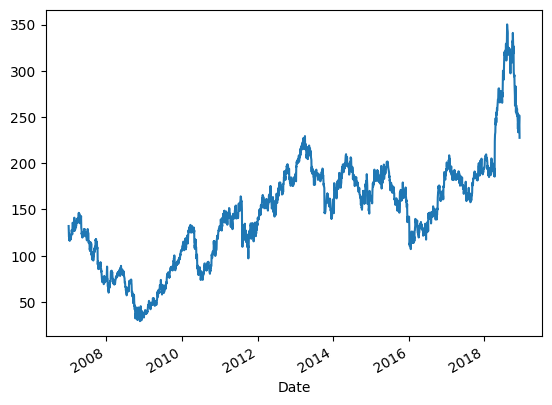

In [186]:
close_df=df['Close'].copy()
close_df.plot()

In [187]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [188]:
n_features=1
n_inputs=5
X1, y1 = df_to_X_y(close_df, n_inputs)
X1.shape, y1.shape

((2995, 5, 1), (2995,))

In [205]:
split_index=300
val_index=2900

X_train1, y_train1 = X1[split_index:val_index], y1[split_index:val_index]
X_val1, y_val1 = X1[:split_index], y1[:split_index]
X_test1,y_test1=X1[val_index:],y1[val_index:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, 

((2600, 5, 1), (2600,), (300, 5, 1), (300,))

In [190]:
print(X_train1.shape)

(2500, 5, 1)


In [191]:
from tensorflow.keras import layers

model1 = Sequential([layers.Input((n_inputs, 1)),
                    layers.LSTM(120),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model1.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 120)               58560     
                                                                 
 dense_28 (Dense)            (None, 32)                3872      
                                                                 
 dense_29 (Dense)            (None, 32)                1056      
                                                                 
 dense_30 (Dense)            (None, 1)                 33        
                                                                 
Total params: 63521 (248.13 KB)
Trainable params: 63521 (248.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [192]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [193]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=500, callbacks=[cp1])

Epoch 1/500
74/79 [===========================>..] - ETA: 0s - loss: 19911.4336 - root_mean_squared_error: 141.1079INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 7s 56ms/step - loss: 19875.3672 - root_mean_squared_error: 140.9800 - val_loss: 42346.8594 - val_root_mean_squared_error: 205.7835
Epoch 2/500
74/79 [===========================>..] - ETA: 0s - loss: 19325.7305 - root_mean_squared_error: 139.0170INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 55ms/step - loss: 19322.3086 - root_mean_squared_error: 139.0047 - val_loss: 41093.9648 - val_root_mean_squared_error: 202.7165
Epoch 3/500
77/79 [============================>.] - ETA: 0s - loss: 17875.1328 - root_mean_squared_error: 133.6979INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 46ms/step - loss: 17878.2070 - root_mean_squared_error: 133.7094 - val_loss: 38010.9961 - val_root_mean_squared_error: 194.9641
Epoch 4/500
72/79 [==========================>...] - ETA: 0s - loss: 14778.6133 - root_mean_squared_error: 121.5673INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 46ms/step - loss: 14602.4092 - root_mean_squared_error: 120.8404 - val_loss: 31160.7129 - val_root_mean_squared_error: 176.5240
Epoch 5/500
74/79 [===========================>..] - ETA: 0s - loss: 9714.4756 - root_mean_squared_error: 98.5620 INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 9636.8740 - root_mean_squared_error: 98.1676 - val_loss: 22507.3145 - val_root_mean_squared_error: 150.0244
Epoch 6/500
75/79 [===========================>..] - ETA: 0s - loss: 6131.2930 - root_mean_squared_error: 78.3026INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 6068.8628 - root_mean_squared_error: 77.9029 - val_loss: 16526.1797 - val_root_mean_squared_error: 128.5542
Epoch 7/500
78/79 [============================>.] - ETA: 0s - loss: 3957.6919 - root_mean_squared_error: 62.9102INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 53ms/step - loss: 3951.6587 - root_mean_squared_error: 62.8622 - val_loss: 12402.0820 - val_root_mean_squared_error: 111.3646
Epoch 8/500
74/79 [===========================>..] - ETA: 0s - loss: 2480.3672 - root_mean_squared_error: 49.8033INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 2454.2498 - root_mean_squared_error: 49.5404 - val_loss: 9209.9609 - val_root_mean_squared_error: 95.9685
Epoch 9/500
72/79 [==========================>...] - ETA: 0s - loss: 1446.1298 - root_mean_squared_error: 38.0280INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 50ms/step - loss: 1452.9694 - root_mean_squared_error: 38.1178 - val_loss: 6873.5425 - val_root_mean_squared_error: 82.9068
Epoch 10/500
77/79 [============================>.] - ETA: 0s - loss: 874.2837 - root_mean_squared_error: 29.5683INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 47ms/step - loss: 868.6167 - root_mean_squared_error: 29.4723 - val_loss: 5207.8833 - val_root_mean_squared_error: 72.1657
Epoch 11/500
74/79 [===========================>..] - ETA: 0s - loss: 543.9249 - root_mean_squared_error: 23.3222INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 5s 59ms/step - loss: 534.2245 - root_mean_squared_error: 23.1133 - val_loss: 4099.8369 - val_root_mean_squared_error: 64.0300
Epoch 12/500
77/79 [============================>.] - ETA: 0s - loss: 341.6125 - root_mean_squared_error: 18.4828INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 46ms/step - loss: 339.2597 - root_mean_squared_error: 18.4190 - val_loss: 3331.1733 - val_root_mean_squared_error: 57.7163
Epoch 13/500
78/79 [============================>.] - ETA: 0s - loss: 223.6279 - root_mean_squared_error: 14.9542INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 48ms/step - loss: 223.3429 - root_mean_squared_error: 14.9447 - val_loss: 2807.5256 - val_root_mean_squared_error: 52.9861
Epoch 14/500
77/79 [============================>.] - ETA: 0s - loss: 156.3233 - root_mean_squared_error: 12.5029INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 155.4733 - root_mean_squared_error: 12.4689 - val_loss: 2440.2253 - val_root_mean_squared_error: 49.3986
Epoch 15/500
74/79 [===========================>..] - ETA: 0s - loss: 111.5925 - root_mean_squared_error: 10.5637INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 111.7195 - root_mean_squared_error: 10.5697 - val_loss: 2166.1833 - val_root_mean_squared_error: 46.5423
Epoch 16/500
73/79 [==========================>...] - ETA: 0s - loss: 86.1434 - root_mean_squared_error: 9.2813INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 51ms/step - loss: 84.6955 - root_mean_squared_error: 9.2030 - val_loss: 1968.7262 - val_root_mean_squared_error: 44.3703
Epoch 17/500
77/79 [============================>.] - ETA: 0s - loss: 66.6070 - root_mean_squared_error: 8.1613INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 48ms/step - loss: 66.6734 - root_mean_squared_error: 8.1654 - val_loss: 1818.8665 - val_root_mean_squared_error: 42.6482
Epoch 18/500
71/79 [=========================>....] - ETA: 0s - loss: 55.7852 - root_mean_squared_error: 7.4689INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 54.2351 - root_mean_squared_error: 7.3644 - val_loss: 1698.9625 - val_root_mean_squared_error: 41.2185
Epoch 19/500
78/79 [============================>.] - ETA: 0s - loss: 45.7105 - root_mean_squared_error: 6.7610INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 49ms/step - loss: 45.6526 - root_mean_squared_error: 6.7567 - val_loss: 1605.7734 - val_root_mean_squared_error: 40.0721
Epoch 20/500
77/79 [============================>.] - ETA: 0s - loss: 39.4967 - root_mean_squared_error: 6.2846INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 46ms/step - loss: 39.3514 - root_mean_squared_error: 6.2731 - val_loss: 1527.0077 - val_root_mean_squared_error: 39.0769
Epoch 21/500
75/79 [===========================>..] - ETA: 0s - loss: 33.8672 - root_mean_squared_error: 5.8196INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 5s 59ms/step - loss: 34.2019 - root_mean_squared_error: 5.8482 - val_loss: 1458.2688 - val_root_mean_squared_error: 38.1873
Epoch 22/500
77/79 [============================>.] - ETA: 0s - loss: 30.6189 - root_mean_squared_error: 5.5334INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 55ms/step - loss: 30.4528 - root_mean_squared_error: 5.5184 - val_loss: 1394.2500 - val_root_mean_squared_error: 37.3397
Epoch 23/500
77/79 [============================>.] - ETA: 0s - loss: 27.5485 - root_mean_squared_error: 5.2487INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 47ms/step - loss: 27.5902 - root_mean_squared_error: 5.2526 - val_loss: 1343.5128 - val_root_mean_squared_error: 36.6540
Epoch 24/500
70/79 [=========================>....] - ETA: 0s - loss: 25.2427 - root_mean_squared_error: 5.0242INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 44ms/step - loss: 25.3888 - root_mean_squared_error: 5.0387 - val_loss: 1296.7009 - val_root_mean_squared_error: 36.0097
Epoch 25/500
67/79 [========================>.....] - ETA: 0s - loss: 23.8886 - root_mean_squared_error: 4.8876INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 46ms/step - loss: 23.8678 - root_mean_squared_error: 4.8855 - val_loss: 1256.5179 - val_root_mean_squared_error: 35.4474
Epoch 26/500
69/79 [=========================>....] - ETA: 0s - loss: 21.8457 - root_mean_squared_error: 4.6739INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 55ms/step - loss: 22.0072 - root_mean_squared_error: 4.6912 - val_loss: 1219.3070 - val_root_mean_squared_error: 34.9186
Epoch 27/500
74/79 [===========================>..] - ETA: 0s - loss: 20.1897 - root_mean_squared_error: 4.4933INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 49ms/step - loss: 20.1948 - root_mean_squared_error: 4.4939 - val_loss: 1185.1545 - val_root_mean_squared_error: 34.4261
Epoch 28/500
77/79 [============================>.] - ETA: 0s - loss: 19.3308 - root_mean_squared_error: 4.3967INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 19.2892 - root_mean_squared_error: 4.3919 - val_loss: 1152.4762 - val_root_mean_squared_error: 33.9481
Epoch 29/500
74/79 [===========================>..] - ETA: 0s - loss: 18.3154 - root_mean_squared_error: 4.2797INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 45ms/step - loss: 18.2415 - root_mean_squared_error: 4.2710 - val_loss: 1122.0667 - val_root_mean_squared_error: 33.4973
Epoch 30/500
77/79 [============================>.] - ETA: 0s - loss: 17.3975 - root_mean_squared_error: 4.1710INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 44ms/step - loss: 17.5261 - root_mean_squared_error: 4.1864 - val_loss: 1097.4692 - val_root_mean_squared_error: 33.1281
Epoch 31/500
77/79 [============================>.] - ETA: 0s - loss: 16.8192 - root_mean_squared_error: 4.1011INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 51ms/step - loss: 16.7554 - root_mean_squared_error: 4.0933 - val_loss: 1069.1587 - val_root_mean_squared_error: 32.6980
Epoch 32/500
78/79 [============================>.] - ETA: 0s - loss: 16.3522 - root_mean_squared_error: 4.0438INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 48ms/step - loss: 16.3281 - root_mean_squared_error: 4.0408 - val_loss: 1047.1428 - val_root_mean_squared_error: 32.3596
Epoch 33/500
77/79 [============================>.] - ETA: 0s - loss: 16.3859 - root_mean_squared_error: 4.0479INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 49ms/step - loss: 16.3750 - root_mean_squared_error: 4.0466 - val_loss: 1023.4611 - val_root_mean_squared_error: 31.9916
Epoch 34/500
72/79 [==========================>...] - ETA: 0s - loss: 15.4111 - root_mean_squared_error: 3.9257INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 47ms/step - loss: 15.3876 - root_mean_squared_error: 3.9227 - val_loss: 1001.2770 - val_root_mean_squared_error: 31.6430
Epoch 35/500
72/79 [==========================>...] - ETA: 0s - loss: 15.1320 - root_mean_squared_error: 3.8900INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 48ms/step - loss: 15.0612 - root_mean_squared_error: 3.8809 - val_loss: 981.6355 - val_root_mean_squared_error: 31.3311
Epoch 36/500
70/79 [=========================>....] - ETA: 0s - loss: 14.9095 - root_mean_squared_error: 3.8613INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 5s 59ms/step - loss: 14.9139 - root_mean_squared_error: 3.8619 - val_loss: 963.6443 - val_root_mean_squared_error: 31.0426
Epoch 37/500
77/79 [============================>.] - ETA: 0s - loss: 14.3677 - root_mean_squared_error: 3.7905INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 5s 65ms/step - loss: 14.3271 - root_mean_squared_error: 3.7851 - val_loss: 946.3521 - val_root_mean_squared_error: 30.7628
Epoch 38/500
73/79 [==========================>...] - ETA: 0s - loss: 13.9428 - root_mean_squared_error: 3.7340INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 5s 63ms/step - loss: 14.0126 - root_mean_squared_error: 3.7433 - val_loss: 931.1473 - val_root_mean_squared_error: 30.5147
Epoch 39/500
79/79 [==============================] - ETA: 0s - loss: 13.8576 - root_mean_squared_error: 3.7226INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 56ms/step - loss: 13.8576 - root_mean_squared_error: 3.7226 - val_loss: 916.8755 - val_root_mean_squared_error: 30.2800
Epoch 40/500
79/79 [==============================] - ETA: 0s - loss: 13.6692 - root_mean_squared_error: 3.6972INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 5s 67ms/step - loss: 13.6692 - root_mean_squared_error: 3.6972 - val_loss: 900.0394 - val_root_mean_squared_error: 30.0007
Epoch 41/500
78/79 [============================>.] - ETA: 0s - loss: 13.4083 - root_mean_squared_error: 3.6617INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 5s 61ms/step - loss: 13.3996 - root_mean_squared_error: 3.6606 - val_loss: 886.8881 - val_root_mean_squared_error: 29.7807
Epoch 42/500
76/79 [===========================>..] - ETA: 0s - loss: 13.6358 - root_mean_squared_error: 3.6927INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 51ms/step - loss: 13.5259 - root_mean_squared_error: 3.6778 - val_loss: 875.2307 - val_root_mean_squared_error: 29.5843
Epoch 43/500
76/79 [===========================>..] - ETA: 0s - loss: 12.9916 - root_mean_squared_error: 3.6044INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 51ms/step - loss: 13.2590 - root_mean_squared_error: 3.6413 - val_loss: 860.9172 - val_root_mean_squared_error: 29.3414
Epoch 44/500
71/79 [=========================>....] - ETA: 0s - loss: 12.9366 - root_mean_squared_error: 3.5968INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 5s 62ms/step - loss: 13.2940 - root_mean_squared_error: 3.6461 - val_loss: 850.1404 - val_root_mean_squared_error: 29.1572
Epoch 45/500
78/79 [============================>.] - ETA: 0s - loss: 13.1126 - root_mean_squared_error: 3.6211INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 5s 62ms/step - loss: 13.1001 - root_mean_squared_error: 3.6194 - val_loss: 838.0103 - val_root_mean_squared_error: 28.9484
Epoch 46/500
78/79 [============================>.] - ETA: 0s - loss: 13.0166 - root_mean_squared_error: 3.6079INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 53ms/step - loss: 13.0523 - root_mean_squared_error: 3.6128 - val_loss: 830.8875 - val_root_mean_squared_error: 28.8251
Epoch 47/500
78/79 [============================>.] - ETA: 0s - loss: 13.0488 - root_mean_squared_error: 3.6123INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 52ms/step - loss: 13.0335 - root_mean_squared_error: 3.6102 - val_loss: 815.4183 - val_root_mean_squared_error: 28.5555
Epoch 48/500
75/79 [===========================>..] - ETA: 0s - loss: 12.8887 - root_mean_squared_error: 3.5901INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 49ms/step - loss: 12.8958 - root_mean_squared_error: 3.5911 - val_loss: 806.4810 - val_root_mean_squared_error: 28.3986
Epoch 49/500
71/79 [=========================>....] - ETA: 0s - loss: 12.9124 - root_mean_squared_error: 3.5934INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 49ms/step - loss: 12.9727 - root_mean_squared_error: 3.6018 - val_loss: 797.1582 - val_root_mean_squared_error: 28.2340
Epoch 50/500
75/79 [===========================>..] - ETA: 0s - loss: 12.7648 - root_mean_squared_error: 3.5728INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 5s 60ms/step - loss: 12.8835 - root_mean_squared_error: 3.5894 - val_loss: 787.3448 - val_root_mean_squared_error: 28.0597
Epoch 51/500
76/79 [===========================>..] - ETA: 0s - loss: 12.9995 - root_mean_squared_error: 3.6055INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 53ms/step - loss: 12.9172 - root_mean_squared_error: 3.5941 - val_loss: 779.0071 - val_root_mean_squared_error: 27.9107
Epoch 52/500
79/79 [==============================] - ETA: 0s - loss: 12.7934 - root_mean_squared_error: 3.5768INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 52ms/step - loss: 12.7934 - root_mean_squared_error: 3.5768 - val_loss: 771.3632 - val_root_mean_squared_error: 27.7734
Epoch 53/500
73/79 [==========================>...] - ETA: 0s - loss: 12.3831 - root_mean_squared_error: 3.5190INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 47ms/step - loss: 12.4748 - root_mean_squared_error: 3.5320 - val_loss: 764.3970 - val_root_mean_squared_error: 27.6477
Epoch 54/500
74/79 [===========================>..] - ETA: 0s - loss: 12.7303 - root_mean_squared_error: 3.5679INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 50ms/step - loss: 12.6053 - root_mean_squared_error: 3.5504 - val_loss: 758.4472 - val_root_mean_squared_error: 27.5399
Epoch 55/500
73/79 [==========================>...] - ETA: 0s - loss: 12.4015 - root_mean_squared_error: 3.5216INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 5s 69ms/step - loss: 12.5320 - root_mean_squared_error: 3.5401 - val_loss: 750.5580 - val_root_mean_squared_error: 27.3963
Epoch 56/500
78/79 [============================>.] - ETA: 0s - loss: 12.5397 - root_mean_squared_error: 3.5411INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 49ms/step - loss: 12.5287 - root_mean_squared_error: 3.5396 - val_loss: 744.8370 - val_root_mean_squared_error: 27.2917
Epoch 57/500
73/79 [==========================>...] - ETA: 0s - loss: 12.3878 - root_mean_squared_error: 3.5196INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 47ms/step - loss: 12.4601 - root_mean_squared_error: 3.5299 - val_loss: 741.2139 - val_root_mean_squared_error: 27.2252
Epoch 58/500
78/79 [============================>.] - ETA: 0s - loss: 12.5338 - root_mean_squared_error: 3.5403INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 12.5795 - root_mean_squared_error: 3.5468 - val_loss: 737.0388 - val_root_mean_squared_error: 27.1485
Epoch 59/500
70/79 [=========================>....] - ETA: 0s - loss: 12.7465 - root_mean_squared_error: 3.5702INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 45ms/step - loss: 12.4893 - root_mean_squared_error: 3.5340 - val_loss: 726.9938 - val_root_mean_squared_error: 26.9628
Epoch 60/500
73/79 [==========================>...] - ETA: 0s - loss: 12.5016 - root_mean_squared_error: 3.5358INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 51ms/step - loss: 12.3460 - root_mean_squared_error: 3.5137 - val_loss: 722.2442 - val_root_mean_squared_error: 26.8746
Epoch 61/500
79/79 [==============================] - ETA: 0s - loss: 12.2270 - root_mean_squared_error: 3.4967INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 45ms/step - loss: 12.2270 - root_mean_squared_error: 3.4967 - val_loss: 717.0089 - val_root_mean_squared_error: 26.7770
Epoch 62/500
76/79 [===========================>..] - ETA: 0s - loss: 12.2976 - root_mean_squared_error: 3.5068INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 47ms/step - loss: 12.3750 - root_mean_squared_error: 3.5178 - val_loss: 710.6031 - val_root_mean_squared_error: 26.6571
Epoch 63/500
75/79 [===========================>..] - ETA: 0s - loss: 12.3764 - root_mean_squared_error: 3.5180INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 12.3855 - root_mean_squared_error: 3.5193 - val_loss: 707.2750 - val_root_mean_squared_error: 26.5946
Epoch 64/500
78/79 [============================>.] - ETA: 0s - loss: 12.4584 - root_mean_squared_error: 3.5296INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 12.4565 - root_mean_squared_error: 3.5294 - val_loss: 700.5641 - val_root_mean_squared_error: 26.4682
Epoch 65/500
75/79 [===========================>..] - ETA: 0s - loss: 12.4242 - root_mean_squared_error: 3.5248INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 52ms/step - loss: 12.3847 - root_mean_squared_error: 3.5192 - val_loss: 696.6965 - val_root_mean_squared_error: 26.3950
Epoch 66/500
72/79 [==========================>...] - ETA: 0s - loss: 12.1839 - root_mean_squared_error: 3.4905INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 44ms/step - loss: 12.1525 - root_mean_squared_error: 3.4861 - val_loss: 694.2584 - val_root_mean_squared_error: 26.3488
Epoch 67/500
71/79 [=========================>....] - ETA: 0s - loss: 12.4411 - root_mean_squared_error: 3.5272INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 12.1929 - root_mean_squared_error: 3.4918 - val_loss: 686.5847 - val_root_mean_squared_error: 26.2028
Epoch 68/500
75/79 [===========================>..] - ETA: 0s - loss: 12.4490 - root_mean_squared_error: 3.5283INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 47ms/step - loss: 12.2743 - root_mean_squared_error: 3.5035 - val_loss: 683.5134 - val_root_mean_squared_error: 26.1441
Epoch 69/500
72/79 [==========================>...] - ETA: 0s - loss: 12.5054 - root_mean_squared_error: 3.5363INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 53ms/step - loss: 12.3916 - root_mean_squared_error: 3.5202 - val_loss: 679.0291 - val_root_mean_squared_error: 26.0582
Epoch 70/500
77/79 [============================>.] - ETA: 0s - loss: 12.4506 - root_mean_squared_error: 3.5285INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 12.5170 - root_mean_squared_error: 3.5379 - val_loss: 677.7098 - val_root_mean_squared_error: 26.0329
Epoch 71/500
73/79 [==========================>...] - ETA: 0s - loss: 12.1523 - root_mean_squared_error: 3.4860INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 12.2853 - root_mean_squared_error: 3.5050 - val_loss: 673.9615 - val_root_mean_squared_error: 25.9608
Epoch 72/500
74/79 [===========================>..] - ETA: 0s - loss: 11.9825 - root_mean_squared_error: 3.4616INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 12.3509 - root_mean_squared_error: 3.5144 - val_loss: 670.8465 - val_root_mean_squared_error: 25.9007
Epoch 73/500
79/79 [==============================] - ETA: 0s - loss: 12.5290 - root_mean_squared_error: 3.5396INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 45ms/step - loss: 12.5290 - root_mean_squared_error: 3.5396 - val_loss: 665.2944 - val_root_mean_squared_error: 25.7933
Epoch 74/500
79/79 [==============================] - 1s 8ms/step - loss: 12.3171 - root_mean_squared_error: 3.5096 - val_loss: 669.5475 - val_root_mean_squared_error: 25.8756
Epoch 75/500
76/79 [===========================>..] - ETA: 0s - loss: 12.3436 - root_mean_squared_error: 3.5133INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 57ms/step - loss: 12.2883 - root_mean_squared_error: 3.5055 - val_loss: 662.8645 - val_root_mean_squared_error: 25.7462
Epoch 76/500
78/79 [============================>.] - ETA: 0s - loss: 12.2199 - root_mean_squared_error: 3.4957INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 49ms/step - loss: 12.2316 - root_mean_squared_error: 3.4974 - val_loss: 656.4456 - val_root_mean_squared_error: 25.6212
Epoch 77/500
76/79 [===========================>..] - ETA: 0s - loss: 12.3762 - root_mean_squared_error: 3.5180INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 48ms/step - loss: 12.2885 - root_mean_squared_error: 3.5055 - val_loss: 652.5024 - val_root_mean_squared_error: 25.5441
Epoch 78/500
79/79 [==============================] - ETA: 0s - loss: 12.4311 - root_mean_squared_error: 3.5258INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 45ms/step - loss: 12.4311 - root_mean_squared_error: 3.5258 - val_loss: 647.8571 - val_root_mean_squared_error: 25.4530
Epoch 79/500
79/79 [==============================] - 1s 7ms/step - loss: 12.3773 - root_mean_squared_error: 3.5181 - val_loss: 648.0662 - val_root_mean_squared_error: 25.4571
Epoch 80/500
76/79 [===========================>..] - ETA: 0s - loss: 12.2956 - root_mean_squared_error: 3.5065INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 45ms/step - loss: 12.2100 - root_mean_squared_error: 3.4943 - val_loss: 644.4652 - val_root_mean_squared_error: 25.3863
Epoch 81/500
79/79 [==============================] - ETA: 0s - loss: 12.5075 - root_mean_squared_error: 3.5366INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 54ms/step - loss: 12.5075 - root_mean_squared_error: 3.5366 - val_loss: 643.0667 - val_root_mean_squared_error: 25.3588
Epoch 82/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1946 - root_mean_squared_error: 3.4921 - val_loss: 643.5975 - val_root_mean_squared_error: 25.3692
Epoch 83/500
79/79 [==============================] - ETA: 0s - loss: 12.5618 - root_mean_squared_error: 3.5443INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 46ms/step - loss: 12.5618 - root_mean_squared_error: 3.5443 - val_loss: 641.7020 - val_root_mean_squared_error: 25.3318
Epoch 84/500
77/79 [============================>.] - ETA: 0s - loss: 12.3078 - root_mean_squared_error: 3.5082INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 45ms/step - loss: 12.3043 - root_mean_squared_error: 3.5077 - val_loss: 635.6433 - val_root_mean_squared_error: 25.2120
Epoch 85/500
78/79 [============================>.] - ETA: 0s - loss: 12.2593 - root_mean_squared_error: 3.5013INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 12.2447 - root_mean_squared_error: 3.4992 - val_loss: 633.2173 - val_root_mean_squared_error: 25.1638
Epoch 86/500
67/79 [========================>.....] - ETA: 0s - loss: 12.4924 - root_mean_squared_error: 3.5345INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 12.3282 - root_mean_squared_error: 3.5112 - val_loss: 629.8840 - val_root_mean_squared_error: 25.0975
Epoch 87/500
79/79 [==============================] - 1s 7ms/step - loss: 12.2819 - root_mean_squared_error: 3.5046 - val_loss: 633.0677 - val_root_mean_squared_error: 25.1608
Epoch 88/500
79/79 [==============================] - 1s 6ms/step - loss: 12.1959 - root_mean_squared_error: 3.4923 - val_loss: 632.4444 - val_root_mean_squared_error: 25.1484
Epoch 89/500
79/79 [==============================] - 0s 6ms/step - loss: 12.1339 - root_mean_squared_error: 3.4834 - val_loss: 630.5304 - val_root_mean_squared_error: 25.1104
Epoch 90/500
70/79 [=========================>....] - ETA: 0s - loss: 12.5375 - root_mean_squared_error: 3.5408INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 56ms/step - loss: 12.3787 - root_mean_squared_error: 3.5183 - val_loss: 623.3917 - val_root_mean_squared_error: 24.9678
Epoch 91/500
74/79 [===========================>..] - ETA: 0s - loss: 12.0782 - root_mean_squared_error: 3.4754INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 49ms/step - loss: 12.1834 - root_mean_squared_error: 3.4905 - val_loss: 623.0997 - val_root_mean_squared_error: 24.9620
Epoch 92/500
79/79 [==============================] - ETA: 0s - loss: 12.2646 - root_mean_squared_error: 3.5021INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 46ms/step - loss: 12.2646 - root_mean_squared_error: 3.5021 - val_loss: 622.5483 - val_root_mean_squared_error: 24.9509
Epoch 93/500
77/79 [============================>.] - ETA: 0s - loss: 12.3380 - root_mean_squared_error: 3.5126INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 46ms/step - loss: 12.3362 - root_mean_squared_error: 3.5123 - val_loss: 614.7943 - val_root_mean_squared_error: 24.7950
Epoch 94/500
79/79 [==============================] - 1s 7ms/step - loss: 12.3586 - root_mean_squared_error: 3.5155 - val_loss: 616.0306 - val_root_mean_squared_error: 24.8200
Epoch 95/500
71/79 [=========================>....] - ETA: 0s - loss: 12.3912 - root_mean_squared_error: 3.5201INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 47ms/step - loss: 12.3190 - root_mean_squared_error: 3.5098 - val_loss: 613.9456 - val_root_mean_squared_error: 24.7779
Epoch 96/500
78/79 [============================>.] - ETA: 0s - loss: 12.2345 - root_mean_squared_error: 3.4978INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 53ms/step - loss: 12.2228 - root_mean_squared_error: 3.4961 - val_loss: 612.5714 - val_root_mean_squared_error: 24.7502
Epoch 97/500
79/79 [==============================] - ETA: 0s - loss: 12.2432 - root_mean_squared_error: 3.4990INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 12.2432 - root_mean_squared_error: 3.4990 - val_loss: 606.8705 - val_root_mean_squared_error: 24.6347
Epoch 98/500
79/79 [==============================] - 1s 7ms/step - loss: 12.2026 - root_mean_squared_error: 3.4932 - val_loss: 611.2872 - val_root_mean_squared_error: 24.7242
Epoch 99/500
76/79 [===========================>..] - ETA: 0s - loss: 11.9330 - root_mean_squared_error: 3.4544INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 44ms/step - loss: 12.2427 - root_mean_squared_error: 3.4990 - val_loss: 606.0623 - val_root_mean_squared_error: 24.6183
Epoch 100/500
79/79 [==============================] - 1s 8ms/step - loss: 12.1705 - root_mean_squared_error: 3.4886 - val_loss: 607.9556 - val_root_mean_squared_error: 24.6568
Epoch 101/500
79/79 [==============================] - 1s 9ms/step - loss: 12.1034 - root_mean_squared_error: 3.4790 - val_loss: 608.5618 - val_root_mean_squared_error: 24.6690
Epoch 102/500
70/79 [=========================>....] - ETA: 0s - loss: 12.4556 - root_mean_squared_error: 3.5293INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 44ms/step - loss: 12.2616 - root_mean_squared_error: 3.5017 - val_loss: 601.1852 - val_root_mean_squared_error: 24.5191
Epoch 103/500
73/79 [==========================>...] - ETA: 0s - loss: 12.5460 - root_mean_squared_error: 3.5420INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 46ms/step - loss: 12.3574 - root_mean_squared_error: 3.5153 - val_loss: 600.3708 - val_root_mean_squared_error: 24.5025
Epoch 104/500
79/79 [==============================] - 1s 7ms/step - loss: 12.0704 - root_mean_squared_error: 3.4742 - val_loss: 603.3130 - val_root_mean_squared_error: 24.5624
Epoch 105/500
79/79 [==============================] - 1s 7ms/step - loss: 12.3285 - root_mean_squared_error: 3.5112 - val_loss: 600.5355 - val_root_mean_squared_error: 24.5058
Epoch 106/500
79/79 [==============================] - 1s 7ms/step - loss: 12.0788 - root_mean_squared_error: 3.4755 - val_loss: 602.5857 - val_root_mean_squared_error: 24.5476
Epoch 107/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1471 - root_mean_squared_error: 3.4853 - val_loss: 601.3138 - val_root_mean_squared_error: 24.5217
Epoch 108/500
77/79 [============================>.] - ETA: 0s - loss: 12.2340 - root_mean_squared_error: 3.4977INFO:tensorflow:

INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 57ms/step - loss: 12.2508 - root_mean_squared_error: 3.5001 - val_loss: 594.5396 - val_root_mean_squared_error: 24.3832
Epoch 109/500
79/79 [==============================] - ETA: 0s - loss: 12.5332 - root_mean_squared_error: 3.5402INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 51ms/step - loss: 12.5332 - root_mean_squared_error: 3.5402 - val_loss: 594.4292 - val_root_mean_squared_error: 24.3809
Epoch 110/500
79/79 [==============================] - 1s 8ms/step - loss: 12.3859 - root_mean_squared_error: 3.5194 - val_loss: 595.0426 - val_root_mean_squared_error: 24.3935
Epoch 111/500
74/79 [===========================>..] - ETA: 0s - loss: 11.9913 - root_mean_squared_error: 3.4628INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 44ms/step - loss: 12.1287 - root_mean_squared_error: 3.4826 - val_loss: 591.2405 - val_root_mean_squared_error: 24.3154
Epoch 112/500
72/79 [==========================>...] - ETA: 0s - loss: 12.1233 - root_mean_squared_error: 3.4818INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 46ms/step - loss: 12.2348 - root_mean_squared_error: 3.4978 - val_loss: 589.7020 - val_root_mean_squared_error: 24.2838
Epoch 113/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1639 - root_mean_squared_error: 3.4877 - val_loss: 590.1603 - val_root_mean_squared_error: 24.2932
Epoch 114/500
79/79 [==============================] - 1s 7ms/step - loss: 12.3461 - root_mean_squared_error: 3.5137 - val_loss: 594.1749 - val_root_mean_squared_error: 24.3757
Epoch 115/500
72/79 [==========================>...] - ETA: 0s - loss: 12.3068 - root_mean_squared_error: 3.5081INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 50ms/step - loss: 12.3228 - root_mean_squared_error: 3.5104 - val_loss: 589.4453 - val_root_mean_squared_error: 24.2785
Epoch 116/500
77/79 [============================>.] - ETA: 0s - loss: 12.4855 - root_mean_squared_error: 3.5335INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 47ms/step - loss: 12.4136 - root_mean_squared_error: 3.5233 - val_loss: 584.1425 - val_root_mean_squared_error: 24.1690
Epoch 117/500
75/79 [===========================>..] - ETA: 0s - loss: 12.1616 - root_mean_squared_error: 3.4873INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 46ms/step - loss: 12.1364 - root_mean_squared_error: 3.4837 - val_loss: 583.2329 - val_root_mean_squared_error: 24.1502
Epoch 118/500
71/79 [=========================>....] - ETA: 0s - loss: 12.2325 - root_mean_squared_error: 3.4975INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 54ms/step - loss: 12.2353 - root_mean_squared_error: 3.4979 - val_loss: 579.7470 - val_root_mean_squared_error: 24.0779
Epoch 119/500
79/79 [==============================] - 1s 8ms/step - loss: 12.6406 - root_mean_squared_error: 3.5554 - val_loss: 591.6130 - val_root_mean_squared_error: 24.3231
Epoch 120/500
79/79 [==============================] - 1s 8ms/step - loss: 12.3357 - root_mean_squared_error: 3.5122 - val_loss: 589.4180 - val_root_mean_squared_error: 24.2779
Epoch 121/500
79/79 [==============================] - 1s 7ms/step - loss: 12.4121 - root_mean_squared_error: 3.5231 - val_loss: 581.7116 - val_root_mean_squared_error: 24.1187
Epoch 122/500
79/79 [==============================] - 1s 7ms/step - loss: 12.2167 - root_mean_squared_error: 3.4952 - val_loss: 585.8660 - val_root_mean_squared_error: 24.2047
Epoch 123/500
79/79 [==============================] - 1s 8ms/step - loss: 12.3181 - root_mean_squared_error: 3.5097 - val_loss:

INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 44ms/step - loss: 12.7184 - root_mean_squared_error: 3.5663 - val_loss: 576.1410 - val_root_mean_squared_error: 24.0029
Epoch 125/500
79/79 [==============================] - 1s 8ms/step - loss: 12.2235 - root_mean_squared_error: 3.4962 - val_loss: 579.2791 - val_root_mean_squared_error: 24.0682
Epoch 126/500
79/79 [==============================] - 1s 8ms/step - loss: 12.2918 - root_mean_squared_error: 3.5060 - val_loss: 580.4401 - val_root_mean_squared_error: 24.0923
Epoch 127/500
72/79 [==========================>...] - ETA: 0s - loss: 12.3088 - root_mean_squared_error: 3.5084INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 51ms/step - loss: 12.2427 - root_mean_squared_error: 3.4990 - val_loss: 575.4972 - val_root_mean_squared_error: 23.9895
Epoch 128/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1706 - root_mean_squared_error: 3.4886 - val_loss: 585.4073 - val_root_mean_squared_error: 24.1952
Epoch 129/500
79/79 [==============================] - 1s 8ms/step - loss: 11.9797 - root_mean_squared_error: 3.4612 - val_loss: 577.2173 - val_root_mean_squared_error: 24.0253
Epoch 130/500
73/79 [==========================>...] - ETA: 0s - loss: 12.2404 - root_mean_squared_error: 3.4986INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 44ms/step - loss: 12.3492 - root_mean_squared_error: 3.5141 - val_loss: 571.0358 - val_root_mean_squared_error: 23.8964
Epoch 131/500
79/79 [==============================] - 1s 7ms/step - loss: 12.2008 - root_mean_squared_error: 3.4930 - val_loss: 582.1566 - val_root_mean_squared_error: 24.1279
Epoch 132/500
79/79 [==============================] - 1s 8ms/step - loss: 12.4456 - root_mean_squared_error: 3.5278 - val_loss: 572.4565 - val_root_mean_squared_error: 23.9261
Epoch 133/500
79/79 [==============================] - 1s 7ms/step - loss: 12.2676 - root_mean_squared_error: 3.5025 - val_loss: 574.0916 - val_root_mean_squared_error: 23.9602
Epoch 134/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1550 - root_mean_squared_error: 3.4864 - val_loss: 572.3394 - val_root_mean_squared_error: 23.9236
Epoch 135/500
79/79 [==============================] - 1s 7ms/step - loss: 12.4550 - root_mean_squared_error: 3.5292 - val_loss:

INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 45ms/step - loss: 12.3338 - root_mean_squared_error: 3.5120 - val_loss: 569.7645 - val_root_mean_squared_error: 23.8697
Epoch 137/500
76/79 [===========================>..] - ETA: 0s - loss: 12.2709 - root_mean_squared_error: 3.5030INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 12.1616 - root_mean_squared_error: 3.4873 - val_loss: 567.1575 - val_root_mean_squared_error: 23.8151
Epoch 138/500
79/79 [==============================] - 1s 8ms/step - loss: 12.2841 - root_mean_squared_error: 3.5049 - val_loss: 568.1120 - val_root_mean_squared_error: 23.8351
Epoch 139/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1920 - root_mean_squared_error: 3.4917 - val_loss: 567.1797 - val_root_mean_squared_error: 23.8155
Epoch 140/500
79/79 [==============================] - 1s 7ms/step - loss: 12.5631 - root_mean_squared_error: 3.5444 - val_loss: 567.3145 - val_root_mean_squared_error: 23.8184
Epoch 141/500
79/79 [==============================] - 1s 8ms/step - loss: 12.1403 - root_mean_squared_error: 3.4843 - val_loss: 573.3688 - val_root_mean_squared_error: 23.9451
Epoch 142/500
75/79 [===========================>..] - ETA: 0s - loss: 12.1709 - root_mean_squared_error: 3.4887INFO:tensorflow:

INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 44ms/step - loss: 12.0764 - root_mean_squared_error: 3.4751 - val_loss: 566.8912 - val_root_mean_squared_error: 23.8095
Epoch 143/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1196 - root_mean_squared_error: 3.4813 - val_loss: 570.6879 - val_root_mean_squared_error: 23.8891
Epoch 144/500
79/79 [==============================] - 1s 8ms/step - loss: 12.2005 - root_mean_squared_error: 3.4929 - val_loss: 570.1772 - val_root_mean_squared_error: 23.8784
Epoch 145/500
79/79 [==============================] - 1s 7ms/step - loss: 12.2585 - root_mean_squared_error: 3.5012 - val_loss: 571.1248 - val_root_mean_squared_error: 23.8982
Epoch 146/500
69/79 [=========================>....] - ETA: 0s - loss: 12.5528 - root_mean_squared_error: 3.5430INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 50ms/step - loss: 12.1229 - root_mean_squared_error: 3.4818 - val_loss: 563.2292 - val_root_mean_squared_error: 23.7325
Epoch 147/500
79/79 [==============================] - 1s 8ms/step - loss: 12.2621 - root_mean_squared_error: 3.5017 - val_loss: 568.9422 - val_root_mean_squared_error: 23.8525
Epoch 148/500
79/79 [==============================] - 1s 8ms/step - loss: 12.1310 - root_mean_squared_error: 3.4830 - val_loss: 565.1085 - val_root_mean_squared_error: 23.7720
Epoch 149/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1617 - root_mean_squared_error: 3.4874 - val_loss: 570.1216 - val_root_mean_squared_error: 23.8772
Epoch 150/500
79/79 [==============================] - 1s 7ms/step - loss: 12.2728 - root_mean_squared_error: 3.5032 - val_loss: 567.4883 - val_root_mean_squared_error: 23.8220
Epoch 151/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1203 - root_mean_squared_error: 3.4814 - val_loss:

INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 45ms/step - loss: 12.2821 - root_mean_squared_error: 3.5046 - val_loss: 562.6429 - val_root_mean_squared_error: 23.7201
Epoch 153/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1578 - root_mean_squared_error: 3.4868 - val_loss: 562.9984 - val_root_mean_squared_error: 23.7276
Epoch 154/500
77/79 [============================>.] - ETA: 0s - loss: 12.1010 - root_mean_squared_error: 3.4787INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 46ms/step - loss: 12.0326 - root_mean_squared_error: 3.4688 - val_loss: 562.4951 - val_root_mean_squared_error: 23.7170
Epoch 155/500
79/79 [==============================] - 1s 7ms/step - loss: 12.2842 - root_mean_squared_error: 3.5049 - val_loss: 567.8435 - val_root_mean_squared_error: 23.8295
Epoch 156/500
79/79 [==============================] - 1s 9ms/step - loss: 11.9867 - root_mean_squared_error: 3.4622 - val_loss: 573.0154 - val_root_mean_squared_error: 23.9377
Epoch 157/500
79/79 [==============================] - 1s 7ms/step - loss: 12.4286 - root_mean_squared_error: 3.5254 - val_loss: 564.3114 - val_root_mean_squared_error: 23.7552
Epoch 158/500
79/79 [==============================] - 1s 7ms/step - loss: 12.4435 - root_mean_squared_error: 3.5275 - val_loss: 568.2718 - val_root_mean_squared_error: 23.8385
Epoch 159/500
79/79 [==============================] - 1s 7ms/step - loss: 12.2854 - root_mean_squared_error: 3.5051 - val_loss:

INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 46ms/step - loss: 12.1346 - root_mean_squared_error: 3.4835 - val_loss: 561.6804 - val_root_mean_squared_error: 23.6998
Epoch 161/500
79/79 [==============================] - 1s 7ms/step - loss: 12.0722 - root_mean_squared_error: 3.4745 - val_loss: 563.8500 - val_root_mean_squared_error: 23.7455
Epoch 162/500
76/79 [===========================>..] - ETA: 0s - loss: 12.4397 - root_mean_squared_error: 3.5270INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 12.4585 - root_mean_squared_error: 3.5297 - val_loss: 559.9447 - val_root_mean_squared_error: 23.6632
Epoch 163/500
79/79 [==============================] - 1s 8ms/step - loss: 12.2778 - root_mean_squared_error: 3.5040 - val_loss: 563.2475 - val_root_mean_squared_error: 23.7328
Epoch 164/500
74/79 [===========================>..] - ETA: 0s - loss: 12.3005 - root_mean_squared_error: 3.5072INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 57ms/step - loss: 12.2114 - root_mean_squared_error: 3.4945 - val_loss: 558.8724 - val_root_mean_squared_error: 23.6405
Epoch 165/500
79/79 [==============================] - 1s 8ms/step - loss: 12.3229 - root_mean_squared_error: 3.5104 - val_loss: 575.4537 - val_root_mean_squared_error: 23.9886
Epoch 166/500
79/79 [==============================] - 1s 8ms/step - loss: 12.5326 - root_mean_squared_error: 3.5401 - val_loss: 563.2145 - val_root_mean_squared_error: 23.7321
Epoch 167/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1584 - root_mean_squared_error: 3.4869 - val_loss: 561.1941 - val_root_mean_squared_error: 23.6895
Epoch 168/500
79/79 [==============================] - 1s 8ms/step - loss: 12.0588 - root_mean_squared_error: 3.4726 - val_loss: 566.2791 - val_root_mean_squared_error: 23.7966
Epoch 169/500
79/79 [==============================] - 1s 7ms/step - loss: 12.3354 - root_mean_squared_error: 3.5122 - val_loss:

INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 45ms/step - loss: 12.2017 - root_mean_squared_error: 3.4931 - val_loss: 552.6799 - val_root_mean_squared_error: 23.5091
Epoch 172/500
79/79 [==============================] - 1s 7ms/step - loss: 12.3364 - root_mean_squared_error: 3.5123 - val_loss: 554.9703 - val_root_mean_squared_error: 23.5578
Epoch 173/500
79/79 [==============================] - 1s 8ms/step - loss: 12.2617 - root_mean_squared_error: 3.5017 - val_loss: 559.6239 - val_root_mean_squared_error: 23.6564
Epoch 174/500
79/79 [==============================] - 1s 7ms/step - loss: 12.2497 - root_mean_squared_error: 3.5000 - val_loss: 553.5292 - val_root_mean_squared_error: 23.5272
Epoch 175/500
79/79 [==============================] - 1s 8ms/step - loss: 12.5579 - root_mean_squared_error: 3.5437 - val_loss: 560.7823 - val_root_mean_squared_error: 23.6808
Epoch 176/500
79/79 [==============================] - 1s 8ms/step - loss: 12.1776 - root_mean_squared_error: 3.4896 - val_loss:

INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 12.0697 - root_mean_squared_error: 3.4741 - val_loss: 550.2062 - val_root_mean_squared_error: 23.4565
Epoch 179/500
79/79 [==============================] - 1s 8ms/step - loss: 12.1197 - root_mean_squared_error: 3.4813 - val_loss: 551.7274 - val_root_mean_squared_error: 23.4889
Epoch 180/500
79/79 [==============================] - 1s 9ms/step - loss: 12.1108 - root_mean_squared_error: 3.4801 - val_loss: 552.4500 - val_root_mean_squared_error: 23.5043
Epoch 181/500
71/79 [=========================>....] - ETA: 0s - loss: 11.7227 - root_mean_squared_error: 3.4238INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 51ms/step - loss: 11.9933 - root_mean_squared_error: 3.4631 - val_loss: 548.2213 - val_root_mean_squared_error: 23.4141
Epoch 182/500
79/79 [==============================] - 1s 8ms/step - loss: 12.2585 - root_mean_squared_error: 3.5012 - val_loss: 553.5490 - val_root_mean_squared_error: 23.5276
Epoch 183/500
79/79 [==============================] - 1s 9ms/step - loss: 12.2275 - root_mean_squared_error: 3.4968 - val_loss: 549.6934 - val_root_mean_squared_error: 23.4455
Epoch 184/500
79/79 [==============================] - 0s 6ms/step - loss: 12.1615 - root_mean_squared_error: 3.4873 - val_loss: 548.3895 - val_root_mean_squared_error: 23.4177
Epoch 185/500
79/79 [==============================] - ETA: 0s - loss: 12.1711 - root_mean_squared_error: 3.4887INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 49ms/step - loss: 12.1711 - root_mean_squared_error: 3.4887 - val_loss: 547.6303 - val_root_mean_squared_error: 23.4015
Epoch 186/500
79/79 [==============================] - 1s 8ms/step - loss: 12.1423 - root_mean_squared_error: 3.4846 - val_loss: 550.2177 - val_root_mean_squared_error: 23.4567
Epoch 187/500
79/79 [==============================] - 1s 8ms/step - loss: 12.1678 - root_mean_squared_error: 3.4882 - val_loss: 552.5731 - val_root_mean_squared_error: 23.5069
Epoch 188/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1537 - root_mean_squared_error: 3.4862 - val_loss: 556.8068 - val_root_mean_squared_error: 23.5968
Epoch 189/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1710 - root_mean_squared_error: 3.4887 - val_loss: 556.2051 - val_root_mean_squared_error: 23.5840
Epoch 190/500
79/79 [==============================] - 1s 7ms/step - loss: 12.3369 - root_mean_squared_error: 3.5124 - val_loss:

INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 12.2886 - root_mean_squared_error: 3.5055 - val_loss: 547.5655 - val_root_mean_squared_error: 23.4001
Epoch 192/500
79/79 [==============================] - 1s 8ms/step - loss: 12.4763 - root_mean_squared_error: 3.5322 - val_loss: 553.6931 - val_root_mean_squared_error: 23.5307
Epoch 193/500
79/79 [==============================] - 1s 7ms/step - loss: 12.3720 - root_mean_squared_error: 3.5174 - val_loss: 550.4758 - val_root_mean_squared_error: 23.4622
Epoch 194/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1956 - root_mean_squared_error: 3.4922 - val_loss: 549.0629 - val_root_mean_squared_error: 23.4321
Epoch 195/500
79/79 [==============================] - ETA: 0s - loss: 12.1141 - root_mean_squared_error: 3.4805INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 46ms/step - loss: 12.1141 - root_mean_squared_error: 3.4805 - val_loss: 545.4151 - val_root_mean_squared_error: 23.3541
Epoch 196/500
79/79 [==============================] - 1s 7ms/step - loss: 12.0688 - root_mean_squared_error: 3.4740 - val_loss: 549.3973 - val_root_mean_squared_error: 23.4392
Epoch 197/500
79/79 [==============================] - 1s 8ms/step - loss: 12.1493 - root_mean_squared_error: 3.4856 - val_loss: 554.2127 - val_root_mean_squared_error: 23.5417
Epoch 198/500
79/79 [==============================] - 1s 7ms/step - loss: 12.3156 - root_mean_squared_error: 3.5094 - val_loss: 550.7115 - val_root_mean_squared_error: 23.4672
Epoch 199/500
76/79 [===========================>..] - ETA: 0s - loss: 12.1251 - root_mean_squared_error: 3.4821INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 50ms/step - loss: 12.0557 - root_mean_squared_error: 3.4721 - val_loss: 542.1691 - val_root_mean_squared_error: 23.2845
Epoch 200/500
79/79 [==============================] - 1s 7ms/step - loss: 12.4115 - root_mean_squared_error: 3.5230 - val_loss: 551.1710 - val_root_mean_squared_error: 23.4770
Epoch 201/500
79/79 [==============================] - 1s 8ms/step - loss: 12.3541 - root_mean_squared_error: 3.5148 - val_loss: 548.6647 - val_root_mean_squared_error: 23.4236
Epoch 202/500
79/79 [==============================] - 1s 7ms/step - loss: 12.0986 - root_mean_squared_error: 3.4783 - val_loss: 544.6572 - val_root_mean_squared_error: 23.3379
Epoch 203/500
79/79 [==============================] - 1s 7ms/step - loss: 12.2307 - root_mean_squared_error: 3.4972 - val_loss: 548.6812 - val_root_mean_squared_error: 23.4239
Epoch 204/500
79/79 [==============================] - 1s 7ms/step - loss: 12.3361 - root_mean_squared_error: 3.5123 - val_loss:

INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 45ms/step - loss: 12.3280 - root_mean_squared_error: 3.5111 - val_loss: 539.6755 - val_root_mean_squared_error: 23.2309
Epoch 212/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1104 - root_mean_squared_error: 3.4800 - val_loss: 542.2037 - val_root_mean_squared_error: 23.2853
Epoch 213/500
79/79 [==============================] - 1s 8ms/step - loss: 12.3285 - root_mean_squared_error: 3.5112 - val_loss: 542.3543 - val_root_mean_squared_error: 23.2885
Epoch 214/500
79/79 [==============================] - 1s 7ms/step - loss: 12.0136 - root_mean_squared_error: 3.4661 - val_loss: 542.2149 - val_root_mean_squared_error: 23.2855
Epoch 215/500
74/79 [===========================>..] - ETA: 0s - loss: 12.1546 - root_mean_squared_error: 3.4863INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 52ms/step - loss: 12.0818 - root_mean_squared_error: 3.4759 - val_loss: 539.2628 - val_root_mean_squared_error: 23.2220
Epoch 216/500
79/79 [==============================] - 1s 7ms/step - loss: 12.2829 - root_mean_squared_error: 3.5047 - val_loss: 544.0310 - val_root_mean_squared_error: 23.3245
Epoch 217/500
79/79 [==============================] - 1s 8ms/step - loss: 12.1887 - root_mean_squared_error: 3.4912 - val_loss: 543.8566 - val_root_mean_squared_error: 23.3207
Epoch 218/500
79/79 [==============================] - 1s 7ms/step - loss: 12.2182 - root_mean_squared_error: 3.4955 - val_loss: 540.7523 - val_root_mean_squared_error: 23.2541
Epoch 219/500
79/79 [==============================] - 1s 8ms/step - loss: 12.2410 - root_mean_squared_error: 3.4987 - val_loss: 546.2505 - val_root_mean_squared_error: 23.3720
Epoch 220/500
79/79 [==============================] - 1s 8ms/step - loss: 12.1274 - root_mean_squared_error: 3.4824 - val_loss:

INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 47ms/step - loss: 12.0196 - root_mean_squared_error: 3.4669 - val_loss: 537.3585 - val_root_mean_squared_error: 23.1810
Epoch 227/500
79/79 [==============================] - 1s 7ms/step - loss: 12.0441 - root_mean_squared_error: 3.4705 - val_loss: 540.2842 - val_root_mean_squared_error: 23.2440
Epoch 228/500
79/79 [==============================] - 1s 8ms/step - loss: 12.4558 - root_mean_squared_error: 3.5293 - val_loss: 539.0915 - val_root_mean_squared_error: 23.2183
Epoch 229/500
71/79 [=========================>....] - ETA: 0s - loss: 12.1817 - root_mean_squared_error: 3.4902INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 44ms/step - loss: 12.1609 - root_mean_squared_error: 3.4872 - val_loss: 535.9024 - val_root_mean_squared_error: 23.1496
Epoch 230/500
79/79 [==============================] - 1s 7ms/step - loss: 12.0960 - root_mean_squared_error: 3.4779 - val_loss: 546.3022 - val_root_mean_squared_error: 23.3731
Epoch 231/500
79/79 [==============================] - 1s 8ms/step - loss: 12.0808 - root_mean_squared_error: 3.4757 - val_loss: 541.4833 - val_root_mean_squared_error: 23.2698
Epoch 232/500
79/79 [==============================] - 1s 7ms/step - loss: 12.2511 - root_mean_squared_error: 3.5002 - val_loss: 536.4635 - val_root_mean_squared_error: 23.1617
Epoch 233/500
75/79 [===========================>..] - ETA: 0s - loss: 12.1519 - root_mean_squared_error: 3.4860INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 12.2270 - root_mean_squared_error: 3.4967 - val_loss: 532.6396 - val_root_mean_squared_error: 23.0790
Epoch 234/500
79/79 [==============================] - 1s 7ms/step - loss: 12.3952 - root_mean_squared_error: 3.5207 - val_loss: 541.3549 - val_root_mean_squared_error: 23.2670
Epoch 235/500
79/79 [==============================] - 1s 8ms/step - loss: 12.1211 - root_mean_squared_error: 3.4815 - val_loss: 538.0339 - val_root_mean_squared_error: 23.1956
Epoch 236/500
77/79 [============================>.] - ETA: 0s - loss: 12.3064 - root_mean_squared_error: 3.5080INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 44ms/step - loss: 12.2917 - root_mean_squared_error: 3.5059 - val_loss: 532.4293 - val_root_mean_squared_error: 23.0744
Epoch 237/500
79/79 [==============================] - 1s 8ms/step - loss: 12.4724 - root_mean_squared_error: 3.5316 - val_loss: 537.2335 - val_root_mean_squared_error: 23.1783
Epoch 238/500
79/79 [==============================] - 1s 7ms/step - loss: 12.0952 - root_mean_squared_error: 3.4778 - val_loss: 534.8127 - val_root_mean_squared_error: 23.1260
Epoch 239/500
79/79 [==============================] - 1s 7ms/step - loss: 12.2845 - root_mean_squared_error: 3.5049 - val_loss: 538.1683 - val_root_mean_squared_error: 23.1985
Epoch 240/500
79/79 [==============================] - 1s 8ms/step - loss: 12.3399 - root_mean_squared_error: 3.5128 - val_loss: 539.1033 - val_root_mean_squared_error: 23.2186
Epoch 241/500
79/79 [==============================] - 1s 7ms/step - loss: 12.2683 - root_mean_squared_error: 3.5026 - val_loss:

INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 51ms/step - loss: 11.9750 - root_mean_squared_error: 3.4605 - val_loss: 531.4908 - val_root_mean_squared_error: 23.0541
Epoch 244/500
73/79 [==========================>...] - ETA: 0s - loss: 12.4291 - root_mean_squared_error: 3.5255INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 46ms/step - loss: 12.1128 - root_mean_squared_error: 3.4803 - val_loss: 529.7455 - val_root_mean_squared_error: 23.0162
Epoch 245/500
79/79 [==============================] - 1s 8ms/step - loss: 12.2525 - root_mean_squared_error: 3.5004 - val_loss: 530.5435 - val_root_mean_squared_error: 23.0335
Epoch 246/500
72/79 [==========================>...] - ETA: 0s - loss: 11.9305 - root_mean_squared_error: 3.4541INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 44ms/step - loss: 12.0601 - root_mean_squared_error: 3.4728 - val_loss: 525.2200 - val_root_mean_squared_error: 22.9177
Epoch 247/500
79/79 [==============================] - 1s 7ms/step - loss: 12.4751 - root_mean_squared_error: 3.5320 - val_loss: 529.7368 - val_root_mean_squared_error: 23.0160
Epoch 248/500
79/79 [==============================] - 1s 8ms/step - loss: 12.3482 - root_mean_squared_error: 3.5140 - val_loss: 528.5673 - val_root_mean_squared_error: 22.9906
Epoch 249/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1123 - root_mean_squared_error: 3.4803 - val_loss: 529.4424 - val_root_mean_squared_error: 23.0096
Epoch 250/500
79/79 [==============================] - 1s 7ms/step - loss: 12.0401 - root_mean_squared_error: 3.4699 - val_loss: 537.1273 - val_root_mean_squared_error: 23.1760
Epoch 251/500
79/79 [==============================] - 1s 7ms/step - loss: 12.0884 - root_mean_squared_error: 3.4768 - val_loss:

INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 12.2430 - root_mean_squared_error: 3.4990 - val_loss: 524.7319 - val_root_mean_squared_error: 22.9070
Epoch 259/500
72/79 [==========================>...] - ETA: 0s - loss: 12.2515 - root_mean_squared_error: 3.5002INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 12.0980 - root_mean_squared_error: 3.4782 - val_loss: 523.7802 - val_root_mean_squared_error: 22.8862
Epoch 260/500
79/79 [==============================] - 1s 8ms/step - loss: 12.2892 - root_mean_squared_error: 3.5056 - val_loss: 530.0519 - val_root_mean_squared_error: 23.0229
Epoch 261/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1714 - root_mean_squared_error: 3.4888 - val_loss: 528.4094 - val_root_mean_squared_error: 22.9872
Epoch 262/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1851 - root_mean_squared_error: 3.4907 - val_loss: 528.5145 - val_root_mean_squared_error: 22.9894
Epoch 263/500
79/79 [==============================] - 1s 7ms/step - loss: 12.2100 - root_mean_squared_error: 3.4943 - val_loss: 528.3147 - val_root_mean_squared_error: 22.9851
Epoch 264/500
79/79 [==============================] - 1s 7ms/step - loss: 12.2248 - root_mean_squared_error: 3.4964 - val_loss:

INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 53ms/step - loss: 12.2445 - root_mean_squared_error: 3.4992 - val_loss: 519.5790 - val_root_mean_squared_error: 22.7943
Epoch 267/500
79/79 [==============================] - 1s 7ms/step - loss: 11.9823 - root_mean_squared_error: 3.4615 - val_loss: 522.1841 - val_root_mean_squared_error: 22.8513
Epoch 268/500
79/79 [==============================] - 1s 8ms/step - loss: 12.2100 - root_mean_squared_error: 3.4943 - val_loss: 532.1333 - val_root_mean_squared_error: 23.0680
Epoch 269/500
79/79 [==============================] - 1s 7ms/step - loss: 12.4273 - root_mean_squared_error: 3.5252 - val_loss: 526.2795 - val_root_mean_squared_error: 22.9408
Epoch 270/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1002 - root_mean_squared_error: 3.4785 - val_loss: 526.5811 - val_root_mean_squared_error: 22.9474
Epoch 271/500
79/79 [==============================] - 1s 8ms/step - loss: 12.1156 - root_mean_squared_error: 3.4807 - val_loss:

INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 12.2506 - root_mean_squared_error: 3.5001 - val_loss: 519.1028 - val_root_mean_squared_error: 22.7838
Epoch 278/500
74/79 [===========================>..] - ETA: 0s - loss: 12.2356 - root_mean_squared_error: 3.4979INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 51ms/step - loss: 12.0645 - root_mean_squared_error: 3.4734 - val_loss: 517.5513 - val_root_mean_squared_error: 22.7498
Epoch 279/500
79/79 [==============================] - 1s 8ms/step - loss: 12.0384 - root_mean_squared_error: 3.4696 - val_loss: 521.3523 - val_root_mean_squared_error: 22.8331
Epoch 280/500
79/79 [==============================] - 1s 8ms/step - loss: 12.0810 - root_mean_squared_error: 3.4758 - val_loss: 521.7771 - val_root_mean_squared_error: 22.8424
Epoch 281/500
74/79 [===========================>..] - ETA: 0s - loss: 11.8690 - root_mean_squared_error: 3.4451INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 12.4793 - root_mean_squared_error: 3.5326 - val_loss: 516.5840 - val_root_mean_squared_error: 22.7285
Epoch 282/500
73/79 [==========================>...] - ETA: 0s - loss: 12.2663 - root_mean_squared_error: 3.5023INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 52ms/step - loss: 12.2908 - root_mean_squared_error: 3.5058 - val_loss: 514.0258 - val_root_mean_squared_error: 22.6721
Epoch 283/500
76/79 [===========================>..] - ETA: 0s - loss: 12.1336 - root_mean_squared_error: 3.4833INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 46ms/step - loss: 12.0043 - root_mean_squared_error: 3.4647 - val_loss: 510.1451 - val_root_mean_squared_error: 22.5864
Epoch 284/500
79/79 [==============================] - 1s 8ms/step - loss: 12.3405 - root_mean_squared_error: 3.5129 - val_loss: 516.7589 - val_root_mean_squared_error: 22.7323
Epoch 285/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1429 - root_mean_squared_error: 3.4847 - val_loss: 520.3181 - val_root_mean_squared_error: 22.8105
Epoch 286/500
79/79 [==============================] - 1s 8ms/step - loss: 12.1202 - root_mean_squared_error: 3.4814 - val_loss: 512.6340 - val_root_mean_squared_error: 22.6414
Epoch 287/500
79/79 [==============================] - 1s 8ms/step - loss: 12.0072 - root_mean_squared_error: 3.4651 - val_loss: 517.6215 - val_root_mean_squared_error: 22.7513
Epoch 288/500
79/79 [==============================] - 1s 8ms/step - loss: 12.0167 - root_mean_squared_error: 3.4665 - val_loss:

INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 48ms/step - loss: 12.2865 - root_mean_squared_error: 3.5052 - val_loss: 509.7636 - val_root_mean_squared_error: 22.5779
Epoch 292/500
79/79 [==============================] - 1s 8ms/step - loss: 12.0764 - root_mean_squared_error: 3.4751 - val_loss: 516.6421 - val_root_mean_squared_error: 22.7298
Epoch 293/500
79/79 [==============================] - 1s 8ms/step - loss: 12.1075 - root_mean_squared_error: 3.4796 - val_loss: 517.7878 - val_root_mean_squared_error: 22.7550
Epoch 294/500
76/79 [===========================>..] - ETA: 0s - loss: 11.9816 - root_mean_squared_error: 3.4614INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 44ms/step - loss: 11.9617 - root_mean_squared_error: 3.4586 - val_loss: 509.5527 - val_root_mean_squared_error: 22.5733
Epoch 295/500
79/79 [==============================] - 1s 8ms/step - loss: 12.1183 - root_mean_squared_error: 3.4811 - val_loss: 527.1709 - val_root_mean_squared_error: 22.9602
Epoch 296/500
79/79 [==============================] - 1s 8ms/step - loss: 12.4685 - root_mean_squared_error: 3.5311 - val_loss: 515.4278 - val_root_mean_squared_error: 22.7030
Epoch 297/500
79/79 [==============================] - 1s 7ms/step - loss: 12.0909 - root_mean_squared_error: 3.4772 - val_loss: 516.4852 - val_root_mean_squared_error: 22.7263
Epoch 298/500
79/79 [==============================] - 1s 7ms/step - loss: 12.0791 - root_mean_squared_error: 3.4755 - val_loss: 514.0637 - val_root_mean_squared_error: 22.6730
Epoch 299/500
79/79 [==============================] - 1s 8ms/step - loss: 12.3174 - root_mean_squared_error: 3.5096 - val_loss:

INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 49ms/step - loss: 11.9972 - root_mean_squared_error: 3.4637 - val_loss: 507.2442 - val_root_mean_squared_error: 22.5221
Epoch 302/500
79/79 [==============================] - 1s 8ms/step - loss: 12.1830 - root_mean_squared_error: 3.4904 - val_loss: 508.4841 - val_root_mean_squared_error: 22.5496
Epoch 303/500
79/79 [==============================] - 1s 8ms/step - loss: 12.1710 - root_mean_squared_error: 3.4887 - val_loss: 509.8010 - val_root_mean_squared_error: 22.5788
Epoch 304/500
79/79 [==============================] - 1s 8ms/step - loss: 12.0715 - root_mean_squared_error: 3.4744 - val_loss: 513.9116 - val_root_mean_squared_error: 22.6696
Epoch 305/500
79/79 [==============================] - 1s 8ms/step - loss: 12.0907 - root_mean_squared_error: 3.4772 - val_loss: 508.0731 - val_root_mean_squared_error: 22.5405
Epoch 306/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1973 - root_mean_squared_error: 3.4925 - val_loss:

INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 52ms/step - loss: 12.0306 - root_mean_squared_error: 3.4685 - val_loss: 502.9104 - val_root_mean_squared_error: 22.4257
Epoch 330/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1081 - root_mean_squared_error: 3.4797 - val_loss: 513.3304 - val_root_mean_squared_error: 22.6568
Epoch 331/500
78/79 [============================>.] - ETA: 0s - loss: 12.8124 - root_mean_squared_error: 3.5794INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 12.8010 - root_mean_squared_error: 3.5778 - val_loss: 500.2740 - val_root_mean_squared_error: 22.3668
Epoch 332/500
79/79 [==============================] - 1s 7ms/step - loss: 12.2648 - root_mean_squared_error: 3.5021 - val_loss: 509.0762 - val_root_mean_squared_error: 22.5627
Epoch 333/500
79/79 [==============================] - 1s 8ms/step - loss: 12.2100 - root_mean_squared_error: 3.4943 - val_loss: 505.8983 - val_root_mean_squared_error: 22.4922
Epoch 334/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1711 - root_mean_squared_error: 3.4887 - val_loss: 512.2952 - val_root_mean_squared_error: 22.6339
Epoch 335/500
79/79 [==============================] - 1s 7ms/step - loss: 12.4769 - root_mean_squared_error: 3.5323 - val_loss: 510.3863 - val_root_mean_squared_error: 22.5917
Epoch 336/500
79/79 [==============================] - 1s 8ms/step - loss: 12.2195 - root_mean_squared_error: 3.4956 - val_loss:

INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 12.0397 - root_mean_squared_error: 3.4698 - val_loss: 500.1659 - val_root_mean_squared_error: 22.3644
Epoch 364/500
79/79 [==============================] - 1s 8ms/step - loss: 12.2480 - root_mean_squared_error: 3.4997 - val_loss: 500.8640 - val_root_mean_squared_error: 22.3800
Epoch 365/500
79/79 [==============================] - 1s 9ms/step - loss: 12.1595 - root_mean_squared_error: 3.4871 - val_loss: 502.4108 - val_root_mean_squared_error: 22.4145
Epoch 366/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1512 - root_mean_squared_error: 3.4859 - val_loss: 510.1325 - val_root_mean_squared_error: 22.5861
Epoch 367/500
79/79 [==============================] - 1s 7ms/step - loss: 12.3092 - root_mean_squared_error: 3.5084 - val_loss: 507.0457 - val_root_mean_squared_error: 22.5177
Epoch 368/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1222 - root_mean_squared_error: 3.4817 - val_loss:

INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 46ms/step - loss: 12.2151 - root_mean_squared_error: 3.4950 - val_loss: 498.2776 - val_root_mean_squared_error: 22.3221
Epoch 373/500
79/79 [==============================] - 1s 8ms/step - loss: 12.4168 - root_mean_squared_error: 3.5237 - val_loss: 510.0724 - val_root_mean_squared_error: 22.5848
Epoch 374/500
79/79 [==============================] - 1s 8ms/step - loss: 12.1847 - root_mean_squared_error: 3.4907 - val_loss: 503.9885 - val_root_mean_squared_error: 22.4497
Epoch 375/500
79/79 [==============================] - 1s 7ms/step - loss: 12.0587 - root_mean_squared_error: 3.4726 - val_loss: 504.7324 - val_root_mean_squared_error: 22.4662
Epoch 376/500
79/79 [==============================] - 1s 7ms/step - loss: 12.0115 - root_mean_squared_error: 3.4658 - val_loss: 502.3301 - val_root_mean_squared_error: 22.4127
Epoch 377/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1746 - root_mean_squared_error: 3.4892 - val_loss:

INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 46ms/step - loss: 11.9947 - root_mean_squared_error: 3.4633 - val_loss: 498.2266 - val_root_mean_squared_error: 22.3210
Epoch 402/500
79/79 [==============================] - 1s 7ms/step - loss: 12.0651 - root_mean_squared_error: 3.4735 - val_loss: 510.1173 - val_root_mean_squared_error: 22.5858
Epoch 403/500
79/79 [==============================] - 1s 8ms/step - loss: 12.1890 - root_mean_squared_error: 3.4913 - val_loss: 498.6612 - val_root_mean_squared_error: 22.3307
Epoch 404/500
79/79 [==============================] - 1s 7ms/step - loss: 12.0780 - root_mean_squared_error: 3.4753 - val_loss: 500.2430 - val_root_mean_squared_error: 22.3661
Epoch 405/500
73/79 [==========================>...] - ETA: 0s - loss: 11.9076 - root_mean_squared_error: 3.4507INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 51ms/step - loss: 11.9460 - root_mean_squared_error: 3.4563 - val_loss: 494.0620 - val_root_mean_squared_error: 22.2275
Epoch 406/500
79/79 [==============================] - 1s 8ms/step - loss: 12.2147 - root_mean_squared_error: 3.4950 - val_loss: 502.1014 - val_root_mean_squared_error: 22.4076
Epoch 407/500
79/79 [==============================] - 1s 9ms/step - loss: 12.0045 - root_mean_squared_error: 3.4647 - val_loss: 502.7967 - val_root_mean_squared_error: 22.4231
Epoch 408/500
79/79 [==============================] - 1s 7ms/step - loss: 12.2399 - root_mean_squared_error: 3.4986 - val_loss: 496.1218 - val_root_mean_squared_error: 22.2738
Epoch 409/500
79/79 [==============================] - 1s 7ms/step - loss: 12.0502 - root_mean_squared_error: 3.4713 - val_loss: 501.1095 - val_root_mean_squared_error: 22.3855
Epoch 410/500
79/79 [==============================] - 1s 7ms/step - loss: 12.0374 - root_mean_squared_error: 3.4695 - val_loss:

INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 49ms/step - loss: 12.3297 - root_mean_squared_error: 3.5114 - val_loss: 493.8112 - val_root_mean_squared_error: 22.2219
Epoch 443/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1267 - root_mean_squared_error: 3.4823 - val_loss: 500.5898 - val_root_mean_squared_error: 22.3739
Epoch 444/500
78/79 [============================>.] - ETA: 0s - loss: 12.1189 - root_mean_squared_error: 3.4812INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 44ms/step - loss: 12.1063 - root_mean_squared_error: 3.4794 - val_loss: 492.9508 - val_root_mean_squared_error: 22.2025
Epoch 445/500
79/79 [==============================] - 1s 8ms/step - loss: 11.9414 - root_mean_squared_error: 3.4556 - val_loss: 495.0644 - val_root_mean_squared_error: 22.2500
Epoch 446/500
79/79 [==============================] - 1s 6ms/step - loss: 12.0907 - root_mean_squared_error: 3.4772 - val_loss: 503.3569 - val_root_mean_squared_error: 22.4356
Epoch 447/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1312 - root_mean_squared_error: 3.4830 - val_loss: 505.1461 - val_root_mean_squared_error: 22.4755
Epoch 448/500
79/79 [==============================] - 1s 7ms/step - loss: 12.0508 - root_mean_squared_error: 3.4714 - val_loss: 496.6220 - val_root_mean_squared_error: 22.2850
Epoch 449/500
79/79 [==============================] - 1s 7ms/step - loss: 11.9859 - root_mean_squared_error: 3.4621 - val_loss:

INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 3s 43ms/step - loss: 12.1665 - root_mean_squared_error: 3.4881 - val_loss: 492.6113 - val_root_mean_squared_error: 22.1948
Epoch 475/500
74/79 [===========================>..] - ETA: 0s - loss: 12.2895 - root_mean_squared_error: 3.5056INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


79/79 [==============================] - 4s 45ms/step - loss: 12.2038 - root_mean_squared_error: 3.4934 - val_loss: 483.4718 - val_root_mean_squared_error: 21.9880
Epoch 476/500
79/79 [==============================] - 1s 7ms/step - loss: 12.1417 - root_mean_squared_error: 3.4845 - val_loss: 488.8521 - val_root_mean_squared_error: 22.1100
Epoch 477/500
79/79 [==============================] - 0s 6ms/step - loss: 12.0598 - root_mean_squared_error: 3.4727 - val_loss: 493.4805 - val_root_mean_squared_error: 22.2144
Epoch 478/500
79/79 [==============================] - 1s 7ms/step - loss: 12.0799 - root_mean_squared_error: 3.4756 - val_loss: 494.7146 - val_root_mean_squared_error: 22.2422
Epoch 479/500
79/79 [==============================] - 1s 6ms/step - loss: 12.2078 - root_mean_squared_error: 3.4940 - val_loss: 497.9059 - val_root_mean_squared_error: 22.3138
Epoch 480/500
79/79 [==============================] - 0s 6ms/step - loss: 12.1393 - root_mean_squared_error: 3.4842 - val_loss:

In [194]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [195]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results[50:100]

79/79 [==============================] - 1s 5ms/step


,Train Predictions,Actuals
50,136.450012,136.00
51,136.833130,136.25
52,136.771561,138.25
53,138.917328,139.50
54,140.278122,139.00
55,139.687225,135.25
56,135.951691,137.50
57,138.145432,136.50
58,137.479950,140.50
59,141.064377,139.50


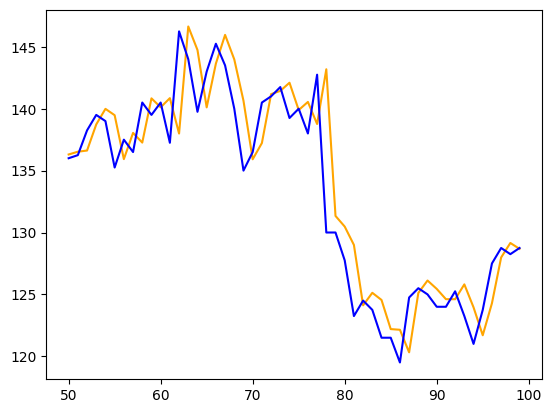

In [111]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100],color='orange')
plt.plot(train_results['Actuals'][50:100],color='blue')

In [112]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

13/13 [==============================] - 0s 4ms/step


,Val Predictions,Actuals
0,186.322021,187.300003
1,187.426758,187.500000
2,187.766403,186.699997
3,187.255920,191.500000
4,191.485748,193.800003
...,...,...
395,316.977570,314.000000
396,316.172028,315.799988
397,316.781586,322.200012
398,319.892120,321.799988


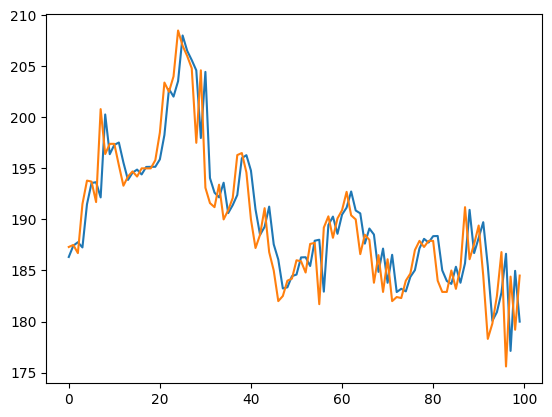

In [113]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [197]:
test_predictions = []

first_eval_batch = X_train1[-1:]
print(first_eval_batch.shape)
current_batch = first_eval_batch.reshape((1, n_inputs , n_features))

for i in range(len(X_test1)):

    # get the prediction value for the first batch
    current_pred = model1.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

# print(test_predictions.shape)

(1, 5, 1)
1/1 [==============================] - 0s 24ms/step


In [198]:
# test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

,Test Predictions,Actuals
0,[183.45164],328.799988
1,[184.34578],329.399994
2,[185.08138],311.000000
3,[185.76466],311.200012
4,[186.44554],315.500000
...,...,...
90,[222.72055],240.300003
91,[222.72089],251.800003
92,[222.72116],249.300003
93,[222.72139],240.000000


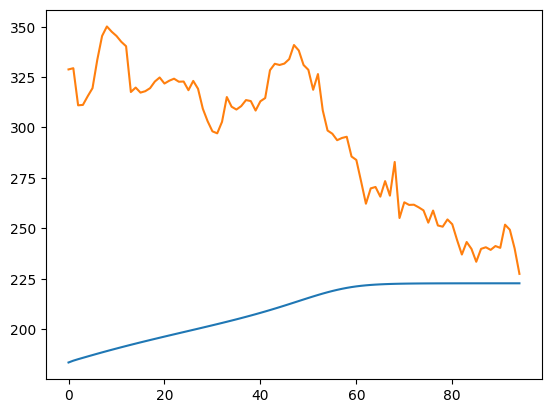

In [199]:
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'])

In [200]:
from sklearn.metrics import mean_squared_error as mse

print(np.sqrt(mse(test_results['Test Predictions'],test_results['Actuals'])))

97.07539601422799


Convolution Model

In [206]:
from tensorflow.keras import layers

In [208]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 4, 64)             192       
                                                                 
 flatten_7 (Flatten)         (None, 256)               0         
                                                                 
 dense_35 (Dense)            (None, 8)                 2056      
                                                                 
 dense_36 (Dense)            (None, 1)                 9         
                                                                 
Total params: 2257 (8.82 KB)
Trainable params: 2257 (8.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [203]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=1000, callbacks=[cp2])

In [121]:
from tensorflow.keras.models import load_model
model2 = load_model('model2/')

In [122]:
train_predictions_convolution = model2.predict(X_train1).flatten()
train_results_convolution = pd.DataFrame(data={'Train Predictions':train_predictions_convolution, 'Actuals':y_train1})
train_results_convolution[50:100]

91/91 [==============================] - 0s 1ms/step


,Train Predictions,Actuals
50,135.995102,136.00
51,136.189728,136.25
52,136.422165,138.25
53,138.263992,139.50
54,139.654480,139.00
55,139.263458,135.25
56,135.813263,137.50
57,137.639343,136.50
58,137.006424,140.50
59,140.492035,139.50


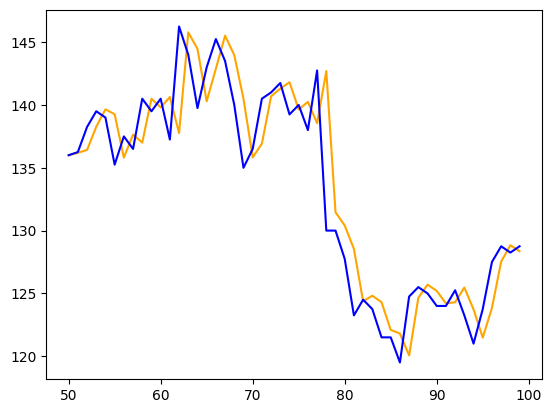

In [162]:
import matplotlib.pyplot as plt
plt.plot(train_results_convolution['Train Predictions'][50:100],color='orange')
plt.plot(train_results_convolution['Actuals'][50:100],color='blue')

In [124]:
val_predictions_convolution = model2.predict(X_val1).flatten()
val_results_convolution = pd.DataFrame(data={'Val Predictions':val_predictions_convolution, 'Actuals':y_val1})
val_results_convolution

13/13 [==============================] - 0s 2ms/step


,Val Predictions,Actuals
0,186.197433,187.300003
1,187.629242,187.500000
2,187.782944,186.699997
3,187.022491,191.500000
4,191.434540,193.800003
...,...,...
395,315.823822,314.000000
396,314.732025,315.799988
397,316.376831,322.200012
398,322.400238,321.799988


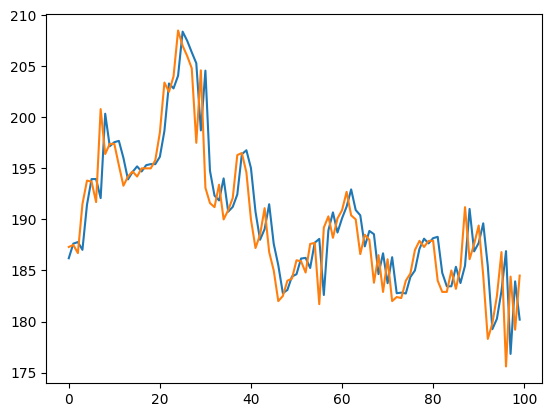

In [125]:
plt.plot(val_results_convolution['Val Predictions'][:100])
plt.plot(val_results_convolution['Actuals'][:100])

In [126]:
test_predictions_convolution = model2.predict(X_test1).flatten()
test_results_convolution = pd.DataFrame(data={'Test Predictions':test_predictions_convolution, 'Actuals':y_test1})
test_results_convolution

3/3 [==============================] - 0s 1ms/step


,Test Predictions,Actuals
0,321.489899,328.799988
1,328.596771,329.399994
2,329.949982,311.000000
3,313.137726,311.200012
4,311.890198,315.500000
...,...,...
90,241.342346,240.300003
91,240.889923,251.800003
92,251.248199,249.300003
93,249.853455,240.000000


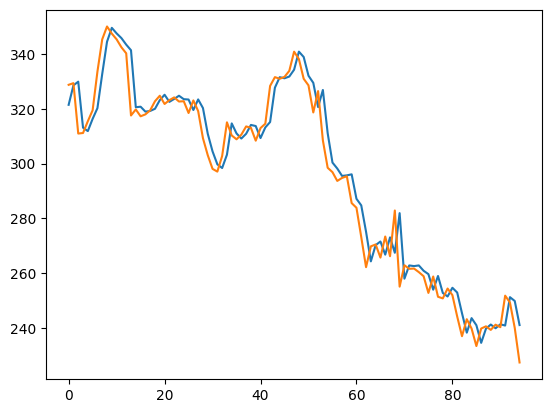

In [127]:
plt.plot(test_results_convolution['Test Predictions'])
plt.plot(test_results_convolution['Actuals'])

In [128]:
from sklearn.metrics import mean_squared_error as mse

print(np.sqrt(mse(test_results_convolution['Test Predictions'],test_results_convolution['Actuals'])))

7.523675995395486


Vayun Code

In [160]:
def combined(col1,col2,alpha):
    predictions_combined = []
    for i in range(len(col2)):
        pred = (alpha*col1[i] + (1-alpha)*col2[i])
        predictions_combined.append(pred)
    return(predictions_combined)

# print(combined(np.array(test_results['Test Predictions']),np.array(test_results_convolution['Test Predictions']),0.15))
    
ensambled_pred=combined(np.array(test_results['Test Predictions']),np.array(test_results_convolution['Test Predictions']),0.15)

7.485982843020989


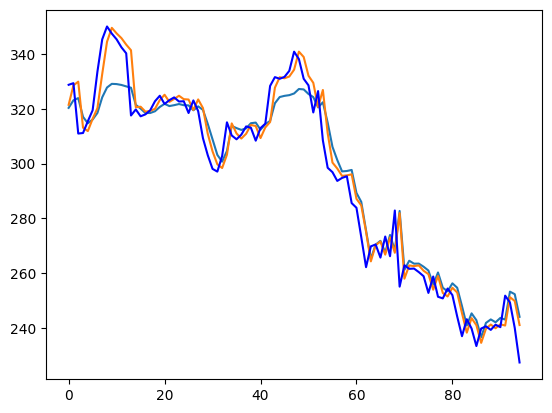

In [141]:
plt.plot(test_results['Test Predictions'])
plt.plot(ensambled_pred,color='Red')
plt.plot(test_results_convolution['Test Predictions'])
# plt.plot(test_results['Actuals'],color='blue')